We import stuff we need

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

I load the data and do a simple linkage with Wards linkage

In [2]:
df=pd.read_csv("https://github.com/CALDISS-AAU/sdsphd19_coursematerials/blob/master/data/data.csv")
X = df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]
X_1 = df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]
linked = linkage(X, 'ward')

Let's look at the data and try a dendrogram

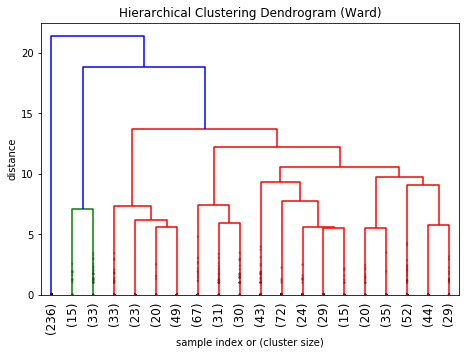

In [3]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

Now, we try different runs of different number of clusters

In [4]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df['cluster'+k]=labels

Cluster count- 2 |  db score- 1.14 |  ch score -  163.87 |  ss score -  0.19
Cluster count- 3 |  db score- 1.27 |  ch score -  169.06 |  ss score -  0.22
Cluster count- 4 |  db score- 1.7 |  ch score -  151.62 |  ss score -  0.26
Cluster count- 5 |  db score- 2.0 |  ch score -  141.16 |  ss score -  0.28
Cluster count- 6 |  db score- 2.08 |  ch score -  131.83 |  ss score -  0.31
Cluster count- 7 |  db score- 1.91 |  ch score -  124.82 |  ss score -  0.32
Cluster count- 8 |  db score- 1.83 |  ch score -  120.28 |  ss score -  0.34
Cluster count- 9 |  db score- 1.63 |  ch score -  117.46 |  ss score -  0.35
Cluster count- 10 |  db score- 1.59 |  ch score -  113.19 |  ss score -  0.37


Let's look at the clusters one by one



... and the results for 2 clusters are!
cluster2              0          1
criminals          0.41       0.00
diffrace           0.09       0.00
leftwings          0.12       0.00
alcoholics         0.48       0.00
rightwings         0.29       0.00
manykids           0.05       0.00
neurotics          0.19       0.00
muslims            0.22       0.00
imigrants          0.14       0.00
aids               0.07       0.00
addicts            0.80       0.00
homoseksuals       0.10       0.00
jews               0.03       0.00
gypsies            0.20       0.00
age               44.66      48.15
income        386855.31  380311.02
edu                1.68       1.60

And the size of the clusters if there are 2 clusters are
cluster2
0    664
1    236
Name: id, dtype: int64

And if we have 2 clusters, the dendrogram looks like


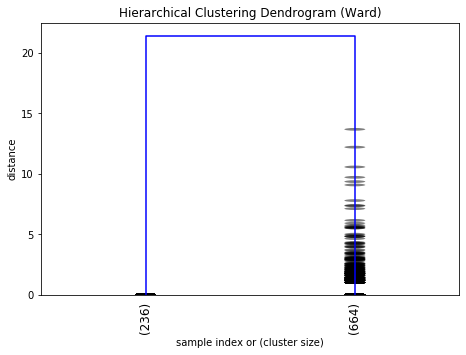



... and the results for 3 clusters are!
cluster3              0          1          2
criminals          0.37       0.00       0.90
diffrace           0.03       0.00       0.94
leftwings          0.09       0.00       0.56
alcoholics         0.45       0.00       0.90
rightwings         0.28       0.00       0.42
manykids           0.03       0.00       0.33
neurotics          0.17       0.00       0.50
muslims            0.16       0.00       0.98
imigrants          0.08       0.00       0.96
aids               0.05       0.00       0.38
addicts            0.79       0.00       0.96
homoseksuals       0.07       0.00       0.48
jews               0.01       0.00       0.27
gypsies            0.16       0.00       0.81
age               43.76      48.15      56.21
income        394456.21  380311.02  289310.42
edu                1.71       1.60       1.35

And the size of the clusters if there are 3 clusters are
cluster3
0    616
1    236
2     48
Name: id, dtype: int64

And if we ha

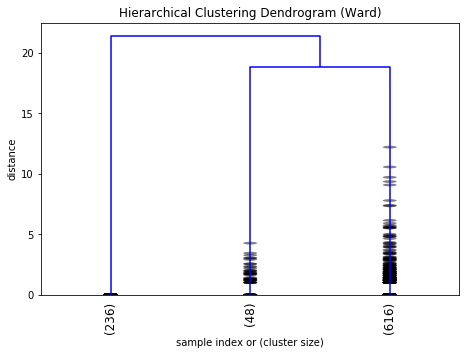



... and the results for 4 clusters are!
cluster4              0          1          2          3
criminals          0.41       0.23       0.90       0.00
diffrace           0.04       0.00       0.94       0.00
leftwings          0.04       0.26       0.56       0.00
alcoholics         0.50       0.28       0.90       0.00
rightwings         0.11       0.94       0.42       0.00
manykids           0.03       0.02       0.33       0.00
neurotics          0.21       0.00       0.50       0.00
muslims            0.19       0.02       0.98       0.00
imigrants          0.09       0.02       0.96       0.00
aids               0.06       0.00       0.38       0.00
addicts            0.82       0.69       0.96       0.00
homoseksuals       0.09       0.00       0.48       0.00
jews               0.02       0.00       0.27       0.00
gypsies            0.18       0.05       0.81       0.00
age               44.56      40.66      56.21      48.15
income        393295.37  399016.00  289310.42 

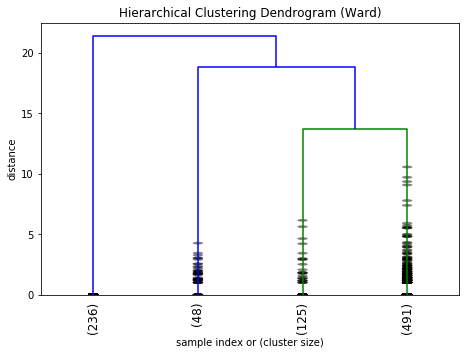



... and the results for 5 clusters are!
cluster5              0          1          2          3          4
criminals          0.25       0.87       0.90       0.00       0.23
diffrace           0.04       0.03       0.94       0.00       0.00
leftwings          0.03       0.09       0.56       0.00       0.26
alcoholics         0.37       0.86       0.90       0.00       0.28
rightwings         0.11       0.09       0.42       0.00       0.94
manykids           0.03       0.02       0.33       0.00       0.02
neurotics          0.18       0.29       0.50       0.00       0.00
muslims            0.15       0.30       0.98       0.00       0.02
imigrants          0.09       0.11       0.96       0.00       0.02
aids               0.02       0.18       0.38       0.00       0.00
addicts            0.76       0.97       0.96       0.00       0.69
homoseksuals       0.03       0.27       0.48       0.00       0.00
jews               0.02       0.02       0.27       0.00       0.00
gypsie

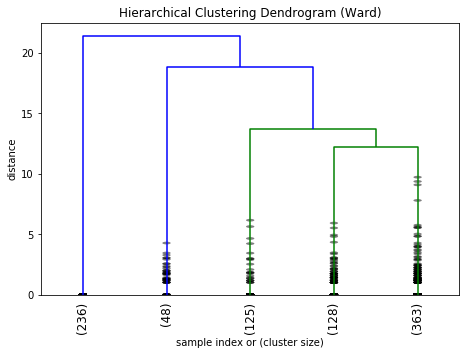

In [5]:
for i in range(2,6):
	i=str(i)
	X_1=df[['cluster'+i,'criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies', 'age', 'income', 'edu']]
	stuff=X_1.groupby(['cluster'+i]).mean()
	trans_stuff=stuff.T
	ts=round(trans_stuff,2)
	print("")
	print("")
	print('... and the results for' ,i, 'clusters are!')	
	print(ts)
	print("")
	count=df.groupby(['cluster'+i])['id'].count()
	print("And the size of the clusters if there are",i, "clusters are")
	print(count)
	print("")
	print("And if we have",i,"clusters, the dendrogram looks like")
	i=int(i)
	figure = plt.figure(figsize=(7.5, 5))
	dendrogram(
	        linked,
		truncate_mode='lastp',  # show only the last p merged clusters
		p=i,  # show only the last p merged clusters
		leaf_rotation=90.,
		leaf_font_size=12.,
		show_contracted=True,  # to get a distribution impression in truncated branches
	)
	plt.title('Hierarchical Clustering Dendrogram (Ward)')
	plt.xlabel('sample index or (cluster size)')
	plt.ylabel('distance')
	plt.show()